# Machine Learning Homework 1

### Task 1

试析随机森林为何比决策树Bagging 集成的训练速度更快。

Author: Zhilong Hong

In [1]:
# Import part
import time
import pandas as pd
from scipy.stats import uniform
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
# Read data from file

def convert_rank_to_int(rank):
    return ord(rank) - 96


f = open("./dataset/krkopt.data", 'r')
data_set = []
for line in f.readlines():
    data = line.strip().split(',')
    data_set.append({
        "white-king-file": convert_rank_to_int(data[0]),
        "white-king-rank": data[1],
        "white-rook-file": convert_rank_to_int(data[2]),
        "white-root-rank": data[3],
        "black-king-file": convert_rank_to_int(data[4]),
        "black-king-rank": data[5],
        "optimal-depth-of-win": data[6]
    })
data_set = pd.DataFrame.from_dict(data_set)

In [3]:
# Prepare dataset
k_fold_split = 5
x = data_set[[col for col in data_set.columns if col not in ["optimal-depth-of-win"]]]
y = data_set[["optimal-depth-of-win"]].values.reshape((-1))
kf = KFold(n_splits=k_fold_split, shuffle=True)

In [4]:
%%time
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
clf = RandomForestClassifier(n_estimators=10, n_jobs=8)
clf.fit(x_train, y_train)
score = accuracy_score(y_test, clf.predict(x_test))
print('Score: ', score)

Score:  0.776728439059
Wall time: 325 ms


In [5]:
%%time
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
clf = BaggingClassifier(n_estimators=10, n_jobs=8)
clf.fit(x_train, y_train)
score = accuracy_score(y_test, clf.predict(x_test))
print('Score: ', score)

Score:  0.852637205987
Wall time: 3.99 s


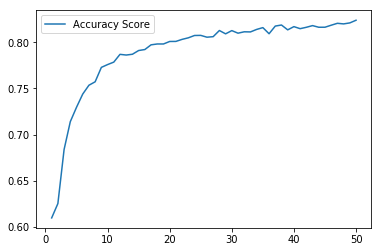

Max Accuracy Score:  0.823887485292


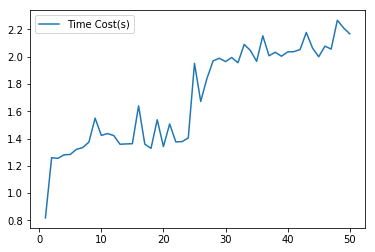

Time:  85.45165214664192


In [6]:
# Fit the model
score_list = []
time_list = []
start_time = time.clock()
iterate_time = time.clock()
for i in range(1, 51):
    clf = RandomForestClassifier(n_estimators=i, n_jobs=8)
    score_of_this_iteration = 0
    for train_index, test_index in kf.split(x):
        clf.fit(x.iloc[train_index], y[train_index])
        score = accuracy_score(y[test_index], clf.predict(x.iloc[test_index]))
        score_of_this_iteration = score_of_this_iteration + score
    score_list.append(score_of_this_iteration / k_fold_split)
    time_list.append(time.clock() - iterate_time)
    iterate_time = time.clock()
duration = time.clock() - start_time
plt.plot(range(1, 51), score_list, label="Accuracy Score")
plt.legend()
plt.show()
print("Max Accuracy Score: ", max(score_list))
plt.plot(range(1, 51), time_list, label="Time Cost(s)")
plt.legend()
plt.show()
print("Time: ", duration)

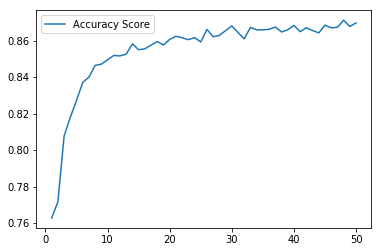

Max Accuracy Score:  0.871150752271


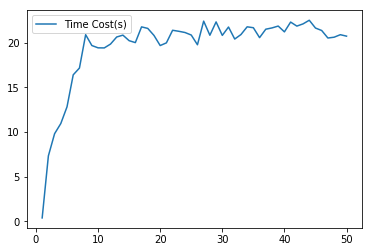

Time:  977.3920034716776


In [7]:
# Fit the model
score_list = []
time_list = []
start_time = time.clock()
iterate_time = time.clock()
for i in range(1, 51):
    clf = BaggingClassifier(n_estimators=i, n_jobs=8)
    score_of_this_iteration = 0
    for train_index, test_index in kf.split(x):
        clf.fit(x.iloc[train_index], y[train_index])
        score = accuracy_score(y[test_index], clf.predict(x.iloc[test_index]))
        score_of_this_iteration = score_of_this_iteration + score
    score_list.append(score_of_this_iteration / k_fold_split)
    time_list.append(time.clock() - iterate_time)
    iterate_time = time.clock()
duration = time.clock() - start_time
plt.plot(range(1, 51), score_list, label="Accuracy Score")
plt.legend()
plt.show()
print("Max Accuracy Score: ", max(score_list))
plt.plot(range(1, 51), time_list, label="Time Cost(s)")
plt.legend()
plt.show()
print("Time: ", duration)